# Project Overview

I was inspired by a previous project I did that centered around the murders depicted in the show Psych and how they measued up to the reality of the actual number of homicides in Santa Barbara, where the show takes place. In this project I will basically be replicating the steps I did in that project and apply them to the show Monk and the city of San Francisco. As with the Psych project, the data for the actual total of murders in San Francisco came from the annual Homicide in California report published by the Calfornia Department of Justice.

# Importing Basic Libraries

In [1]:
#Here are the libraries I tend to use in my analysis. I tend to import all of them at once for simplicity.
#If I need more, then I will import them as needed. 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Exploratory Analysis 

In [2]:
#Reading in the dataset I created

monk_data = pd.read_csv('Monk_Murders.csv')

In [3]:
#First look at the dataset

monk_data.head()

,Season,Episode,Murders,Notes,Corresponding Year
0,1,1,3,NaN,2003
1,1,2,1,NaN,2003
2,1,3,1,NaN,2003
3,1,4,2,NaN,2003
4,1,5,0,NaN,2003


In [4]:
#There are 124 rows and 5 columns of data 

monk_data.shape

(124, 5)

In [5]:
#All data types except Notes are integers

monk_data.dtypes

Season                 int64
Episode                int64
Murders                int64
Notes                 object
Corresponding Year     int64
dtype: object

In [6]:
#Here we are checking to see if there are any missing variables
#I know I created the dataset myself, but it's always good to check anyway
#The Notes column has a lot of null values, but they aren't really null, they just didn't need any notes. 

monk_data.isna().sum()

Season                  0
Episode                 0
Murders                 0
Notes                 106
Corresponding Year      0
dtype: int64

In [7]:
#Here are some standard statistics from the dataset
#Looks like there were 1.28 murders per episode of Monk, with 11 being the most on a single episode
#My analysis will be mainly on the *yearly* murders depicted in Monk, not per episode

monk_data.describe()

,Season,Episode,Murders,Corresponding Year
count,124.000000,124.000000,124.000000,124.000000
mean,4.612903,8.306452,1.282258,2006.612903
std,2.247708,4.567786,1.253032,2.247708
min,1.000000,1.000000,0.000000,2003.000000
25%,3.000000,4.000000,1.000000,2005.000000
50%,5.000000,8.000000,1.000000,2007.000000
75%,7.000000,12.000000,2.000000,2009.000000
max,8.000000,16.000000,11.000000,2010.000000


In [8]:
#Here I am calibrating the dataset to sum the murders per episode into a yearly figure
#This way I can actually compare Monk to the real amount of homicides in San Francisco, CA

monk_year = monk_data.groupby('Corresponding Year').agg({'Murders':'sum'})

In [9]:
#Checking to see if I did this correctly (I did)

monk_year.head()

,Murders
Corresponding Year,
2003,15
2004,32
2005,16
2006,19
2007,20


In [10]:
#I realized that I named the column "Murders" for both the Monl dataset, and the San Francisco dataset 
#So, I had to rename the Murders column in Monk so as to avoid any confusion

monk_year = monk_year.rename(columns={'Murders': 'Murders(Fictional)'})

[]

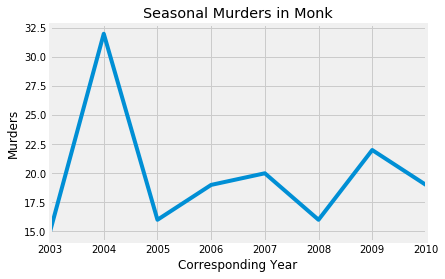

In [11]:
#Here I am plotting the murders portrayed in Monk each season
#The year roughly corresponds to the season, so 2003 = Season 1, etc. 
#Looks like Season 2 saw the greatest amount of murders shown, whereas the rest of the seasons seemed within a narrow range

monk_year['Murders(Fictional)'].plot()

plt.title('Seasonal Murders in Monk')

plt.ylabel('Murders')

plt.plot()

In [12]:
#Here I am importing the San Francisco dataset that has the real yearly total of murders in that city

sanfrancisco = pd.read_csv('SanFrancisco_Murders.csv', index_col = "Year")

In [13]:
#Brief look at the dataset

sanfrancisco.head()

,Murders
Year,
2003,69
2004,88
2005,96
2006,86
2007,100


In [14]:
#There are 8 rows and 1 column of data

sanfrancisco.shape

(8, 1)

In [15]:
#No missing values

sanfrancisco.isnull().sum()

Murders    0
dtype: int64

In [16]:
#Yikes, from 2003-2010 there was an average of 79 murders per year, with the most being 100 in one year

sanfrancisco.describe()

,Murders
count,8.000000
mean,78.750000
std,22.160132
min,45.000000
25%,63.750000
50%,87.000000
75%,96.500000
max,100.000000


[]

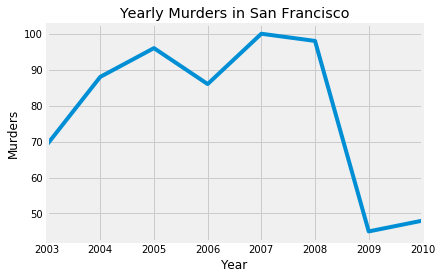

In [17]:
#Here I am plotting the actual recorded murders in San Francisco
#Looks like there was a significant drop in murders from 2008 to 2009. I wonder why

sanfrancisco['Murders'].plot()

plt.title('Yearly Murders in San Francisco')

plt.ylabel('Murders')

plt.plot()

In [18]:
#Here I am combining the datasets of Monk and San Francisco so I can do an easier joint analysis

total_murders = pd.concat([monk_year, sanfrancisco], axis=1, join='inner')

In [19]:
#Brief look at the new dataset

total_murders.head()

,Murders(Fictional),Murders
2003,15,69
2004,32,88
2005,16,96
2006,19,86
2007,20,100


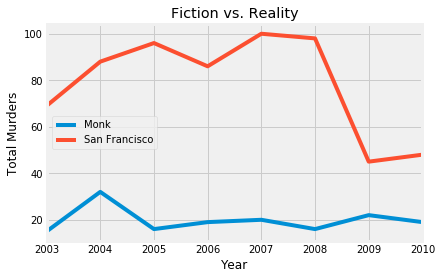

In [20]:
#Plotting both murders side by side
#Unlike what I found for Psych, there were many more murders in San Francisco than shown on Monk

total_murders.plot()

plt.title("Fiction vs. Reality")
plt.xlabel("Year")
plt.ylabel("Total Murders")

plt.legend(['Monk', 'San Francisco'])
plt.show()

# Murders and Ratings

Like what I did for Psych, below I will explore the relationship between the murders on Monk and the ratings for Monk. I did not find any sort of significant relationship in the Psych dataset.

In [21]:
#Here I am uploading the dataset documenting Monk viewership throughout their run on TV

monk_ratings = pd.read_csv('Monk_Ratings.csv', index_col = "Year")

In [22]:
monk_ratings.head()

,Average Ratings,Notes
Year,,
2003,3.87,NaN
2004,4.73,NaN
2005,5.03,NaN
2006,5.15,NaN
2007,5.25,NaN


In [23]:
#The only null values are in the Notes column, which isn't relevant to the analysis

monk_ratings.isna().sum()

Average Ratings    0
Notes              7
dtype: int64

[]

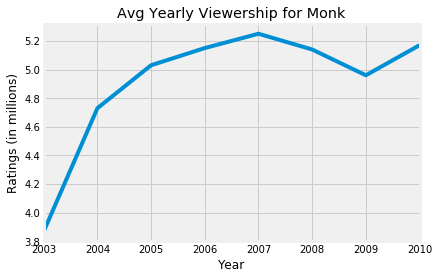

In [24]:
#Here I am plotting the viewership of Monk over time
#It looks like the show had a steady increase in ratings until its peak in 2007
#There also seemed to be an uptick for its final season


monk_ratings['Average Ratings'].plot()

plt.title('Avg Yearly Viewership for Monk')

plt.ylabel('Ratings (in millions)')

plt.plot()

In [25]:
#Here I am combining the Monk murder dataset with the Monk ratings dataset

total_monk = pd.concat([monk_year, monk_ratings], axis=1, join='inner').drop(['Notes'], axis=1)

In [26]:
#Checking the new dataset

total_monk.head()

,Murders(Fictional),Average Ratings
2003,15,3.87
2004,32,4.73
2005,16,5.03
2006,19,5.15
2007,20,5.25


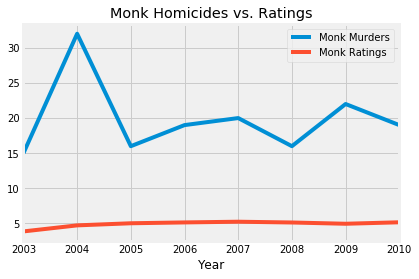

In [27]:
#Here is a plot of the viewership vs. the murders 

total_monk.plot()

plt.title("Monk Homicides vs. Ratings")
plt.xlabel("Year")


plt.legend(['Monk Murders', 'Monk Ratings'])
plt.show()

Like with the Psych dataset, this chart doesn't seem very clean. Therefore I am going to scale and standardize the data.

In [28]:
#Here I am importing the Standard Scaler library and scaling the total_monk dataset

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

monk_scaled = sc_X.fit_transform(total_monk)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
#Here is the reformed total_monk dataset

monk_scaled

array([[-0.95866221, -2.47048493],
       [ 2.38436498, -0.43248297],
       [-0.76201355,  0.27844794],
       [-0.17206758,  0.56282031],
       [ 0.02458108,  0.79979728],
       [-0.76201355,  0.53912261],
       [ 0.4178784 ,  0.11256406],
       [-0.17206758,  0.6102157 ]])

In [30]:
#Here I am converting the numpy array of monk_scaled back into a dataframe 

monk_scaled = pd.DataFrame(monk_scaled, columns=['Murders Scaled', 'Ratings Scaled']) 

print(monk_scaled)

   Murders Scaled  Ratings Scaled
0       -0.958662       -2.470485
1        2.384365       -0.432483
2       -0.762014        0.278448
3       -0.172068        0.562820
4        0.024581        0.799797
5       -0.762014        0.539123
6        0.417878        0.112564
7       -0.172068        0.610216


In [31]:
#Here I am creating a dataframe for years so I can add it to the psych_scaled dataframe

year = pd.DataFrame({'Year':[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]}) 

In [32]:
#Checking if I created the dataframe correctly

year.head()

,Year
0,2003
1,2004
2,2005
3,2006
4,2007


In [33]:
#Here I am officially adding the year dataframe to the monk_scaled dataframe

monk_scaled = pd.concat([year, monk_scaled], axis=1, join='inner')

In [34]:
#Checking if I created the dataframe correctly

monk_scaled.head()

,Year,Murders Scaled,Ratings Scaled
0,2003,-0.958662,-2.470485
1,2004,2.384365,-0.432483
2,2005,-0.762014,0.278448
3,2006,-0.172068,0.562820
4,2007,0.024581,0.799797


In [35]:
#Here I am setting the column "Year" as the index to make it easier for plotting

monk_scaled = monk_scaled.set_index("Year")

In [36]:
monk_scaled.head()

,Murders Scaled,Ratings Scaled
Year,,
2003,-0.958662,-2.470485
2004,2.384365,-0.432483
2005,-0.762014,0.278448
2006,-0.172068,0.562820
2007,0.024581,0.799797


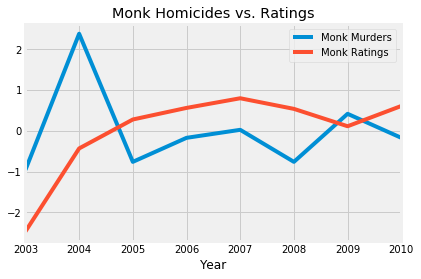

In [37]:
#Here I am plotting the scaled data
#It looks cleaner and more interpretable than before
#However, I still do not see any sort of relationship going on

monk_scaled.plot()

plt.title("Monk Homicides vs. Ratings")
plt.xlabel("Year")


plt.legend(['Monk Murders', 'Monk Ratings'])
plt.show()

#### Checking for actual correlation

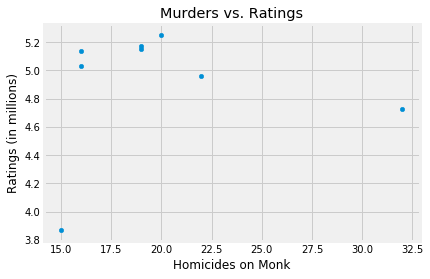

In [38]:
#Here I am plotting the relationship between murders on Monk and the ratings of Monk
#At first glance there does not seem to be any relationship between the two variables

ax = total_monk.plot(kind='scatter', x='Murders(Fictional)', y='Average Ratings')

plt.ylabel("Ratings (in millions)")

plt.xlabel("Homicides on Monk")

plt.title("Murders vs. Ratings");

In [39]:
#Here I am checking for actual correlation and indeed there is a very very weak positive correlation
#Basically negligent 

total_monk.corr()

,Murders(Fictional),Average Ratings
Murders(Fictional),1.000000,0.072377
Average Ratings,0.072377,1.000000


# Basic Linear Regression Model

In [40]:
#Here I am separating X and y values 

X = total_monk.iloc[:,:-1].values
y = total_monk.iloc[:,1].values

In [41]:
#Here I am verifying my X variable

print(X)

[[15]
 [32]
 [16]
 [19]
 [20]
 [16]
 [22]
 [19]]


In [42]:
#Here I am verifying my y variable

print(y)

[3.87 4.73 5.03 5.15 5.25 5.14 4.96 5.17]


In [43]:
#Here I am splitting the dataset into training and test sets
#As you can see, "test size" of .3 means 30% of the data will be used for the test set and 70% for the training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

In [44]:
#Here I setting up my linear regression model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#Here we are fitting the linear regression model to our training set
#We will be using the fit method from the LinearRegression class
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

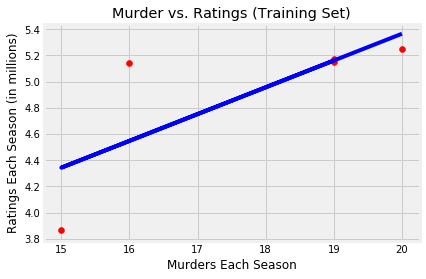

In [45]:
#Here we are plotting our real data, using the training set
#We want to plot the points, then plot the regression line that runs through
#We want to compare the actual data on the training set, to the predicted values derived from the training set

plt.scatter(X_train, y_train, color = "red")

plt.plot(X_train, regressor.predict(X_train), color = "blue")

#Here we are just simply labeling our graph
plt.title("Murder vs. Ratings (Training Set)")
plt.xlabel("Murders Each Season")
plt.ylabel("Ratings Each Season (in millions)")
plt.show()

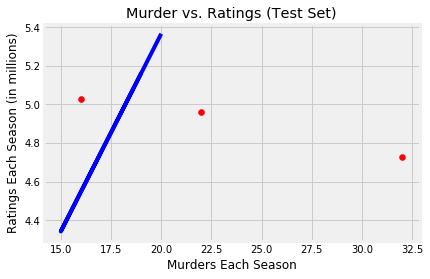

In [46]:
#Here we are plotting our real data, using the test set
#We want to plot the points, then plot the regression line that runs through
#We want to compare the actual data on the test set, to the predicted values derived from the training set (yes, still training set)

plt.scatter(X_test, y_test, color = "red")

plt.plot(X_train, regressor.predict(X_train), color = "blue")

#Here we are just simply labeling our graph
plt.title("Murder vs. Ratings (Test Set)")
plt.xlabel("Murders Each Season")
plt.ylabel("Ratings Each Season (in millions)")
plt.show()

The line does not look like it has much of any predictive capability

In [47]:
#Here I am printing the R-Squared values for the training and test sets
#Both scores are miserable. The model has basically zero explantory power
#There is severe overfitting since the R-Squared on the training set it much larger than the test set

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.5721634506481754
-211.1340892467833


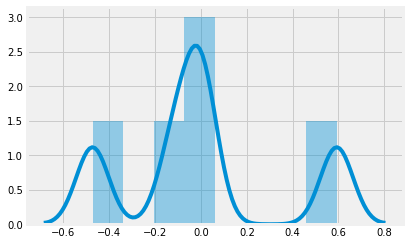

In [48]:
#Here I am just double checking if the errors are normally distributed (homoskedastic vs. heteroskedastic)
#The residuals look like they are in a multimodal distribution
#A multimodal distribution in a sample is usually an indication that the distribution in the population is not normal. 
#It can also indicate that your sample has several patterns of response or extreme views, preferences or attitudes.
#The problem in this case is that we can't cut off any data because we only have 8 rows anyway. 
#Reducing data in this case would be disastrous 

sns.distplot(y_train - regressor.predict(X_train))

#### Log Transformation

Since the errors are heteroskedastic, but we are limited by the amount of data we can gather, I just wanted to check if a log transformation of the data could improve our model.

In [49]:
#First I only want to test the log transformation of our independent variable

total_monk['Log Murders'] = np.log(total_monk['Murders(Fictional)'])

In [50]:
total_monk.head()

,Murders(Fictional),Average Ratings,Log Murders
2003,15,3.87,2.708050
2004,32,4.73,3.465736
2005,16,5.03,2.772589
2006,19,5.15,2.944439
2007,20,5.25,2.995732


In [51]:
#So the log transformation of murders does indeed lead to a stronger correlation with ratings
#However, the correlation overall is still pretty weak

total_monk.corr()

,Murders(Fictional),Average Ratings,Log Murders
Murders(Fictional),1.000000,0.072377,0.992513
Average Ratings,0.072377,1.000000,0.152456
Log Murders,0.992513,0.152456,1.000000


In [52]:
#Here I am separating X and y values 

X2 = total_monk.iloc[:,2:3].values
y2 = total_monk.iloc[:,1].values

In [53]:
#Verify the X variable (log murders)

X2

array([[2.7080502 ],
       [3.4657359 ],
       [2.77258872],
       [2.94443898],
       [2.99573227],
       [2.77258872],
       [3.09104245],
       [2.94443898]])

In [54]:
#Verifying the y variable

y2

array([3.87, 4.73, 5.03, 5.15, 5.25, 5.14, 4.96, 5.17])

In [55]:
#Here I am splitting the dataset into training and test sets
#As you can see, "test size" of .3 means 30% of the data will be used for the test set and 70% for the training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = .3, random_state=0)

In [56]:
#Here I setting up my linear regression model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#Here we are fitting the linear regression model to our training set
#We will be using the fit method from the LinearRegression class
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
#Here I am printing the R-Squared values for the training and test sets
#Both scores are miserable. The model has basically zero explantory power
#Once again we have severe overfitting
#The log transformation did not have any noticeable effect on the explanatory power of the model

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.5931820718529478
-124.65003486897864


In [58]:
#Here I am transforming both the independent and dependent variable
#Perhaps the relationship is log-log, not log-normal

log_monk = np.log(total_monk.iloc[:, 0:2])

In [59]:
log_monk.head()

,Murders(Fictional),Average Ratings
2003,2.708050,1.353255
2004,3.465736,1.553925
2005,2.772589,1.615420
2006,2.944439,1.638997
2007,2.995732,1.658228


In [60]:
#There is a slightly stronger correlation with the log-log model instead of log-normal
#However, as before the overall correlation is weak

log_monk.corr()

,Murders(Fictional),Average Ratings
Murders(Fictional),1.000000,0.178446
Average Ratings,0.178446,1.000000


In [61]:
#Here I am separating X and y values 

X3 = log_monk.iloc[:,:-1].values
y3 = log_monk.iloc[:,1].values

In [62]:
#Here I am splitting the dataset into training and test sets
#As you can see, "test size" of .3 means 30% of the data will be used for the test set and 70% for the training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = .3, random_state=0)

In [63]:
#Here I setting up my linear regression model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

#Here we are fitting the linear regression model to our training set
#We will be using the fit method from the LinearRegression class
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
#Here I am printing the R-Squared values for the training and test sets
#Both scores are miserable. The model has basically zero explantory power
#Severe overfitting and no real improvement. It doesn't matter how many transformations we do, it won't help without more data

print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

0.5868409685563941
-139.99248043125914


#### Verifying Statistical Significance 

In [65]:
#Once again I doubt there is truly any significant relationship between the murders portrayed on Monk and Monk's ratings
#However, just to be thorough I am going to check the statistical significance of the independent variable (murders)
#In order to check the statistical significance, I am going to import the statsmodel library

import statsmodels.api as sm

In [66]:
#Essentially we need a B0X0
#The stats model library is useful, but does not contain the constant column, hence why we add it

#This is specifically a column of 8 "ones" since the constant will just multiply by one to keep its value
#The append function helps us add a new column to our dataset
X3 = np.append(arr =  np.ones((8,1)).astype(int), values = X, axis = 1)

In [67]:
#Checking if X came out correct
#We now have a Beta Constant and a Beta One to plug into our model

X3

array([[ 1, 15],
       [ 1, 32],
       [ 1, 16],
       [ 1, 19],
       [ 1, 20],
       [ 1, 16],
       [ 1, 22],
       [ 1, 19]], dtype=int64)

In [68]:
#The stats model has an OLS method that gives us a nice statistical summary of our model

regressor_OLS = sm.OLS(endog = y3, exog = X3).fit()

In [69]:
#Here we are checking the p-values of our various X variables
#Our indepedent variable has a p-value of .8, way higher than standard significance of .05
#As suspected, there is no statistical significance to the murders on Monk as it pertains to Monks's ratings

regressor_OLS.summary()

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.155
Method:                 Least Squares   F-statistic:                   0.06015
Date:                Sun, 21 Jun 2020   Prob (F-statistic):              0.814
Time:                        15:04:16   Log-Likelihood:                 7.6348
No. Observations:                   8   AIC:                            -11.27
Df Residuals:                       6   BIC:                            -11.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5512      0.153     10.108      0.000       1.176       1.927
x1             0.0018      0.007      0.245      0.814      -0.016       0.020
==============================================================================
Omnibus:                       12.178   Durbin-Watson:                   0.607
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.311
Skew:                          -1.658   Prob(JB):                        0.116
Kurtosis:                       4.391   Cond. No.                         82.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""